# Organización de Datos (75.06/95.58)
## Primer Cuatrimestre 2021
### Trabajo Práctico N°1
#### Curso 1: Argerich

----

##### Introducción:
En el año 2015 Nepal fue afectado por el terremoto Gorkha, un sismo que registró una
magnitud de 7.8 en la escala Richter y tuvo su epicentro en la ciudad de Kathmandu.
Aproximadamente 600,000 estructuras en el centro y pueblos aledaños fueron dañadas o
destruidas. Un análisis posterior al sismo llevado por la Comisión Nacional de
Planeamiento de Nepal comunicó que la pérdida total económica ocasionada por el
terremoto fue de aproximadamente $7 mil millones (USD; NPC, 2015).
El dataset para el presente TP está compuesto de encuestas realizadas por Kathmandu
Living Labs y el Central Bureau of Statistics y contiene información sobre el impacto del
terremoto, estado de viviendas y estadísticas sociodemográficas.
Particularmente el dataset se enfoca en cómo eran las condiciones de una determinada vivienda y cuál fue su grado de daño luego del accidente. 

##### Objetivo:
El TP consiste en realizar un análisis exploratorio de los datos provistos con el objetivo de
determinar características y variables importantes, descubrir insights interesantes, y
analizar la estructura de los mismos.

# Analisis exploratorio de los datos
#### Empecemos importando los recursos necesarios

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

#seteando la paleta de colores
cmap = sns.color_palette('YlGnBu', n_colors=200)
cmapMatplotlib = cm.get_cmap('Spectral')

In [2]:
# lectura de archivos csv
train_values=pd.read_csv('train_values.csv',
                        dtype={
                            'geo_level_1_id':'int8',
                            'geo_level_2_id':'int16',
                            'geo_level_3_id':'int16',
                            'count_floors_pre_eq':'int8',
                            'age':'int16',
                            'area_percentage':'int8',
                            'height_percentage':'int8',
                            'land_surface_condition':'category',                 
                            'foundation_type':'category',                          
                            'roof_type':'category',                                 
                            'ground_floor_type':'category',                        
                            'other_floor_type':'category',                          
                            'position':'category',                                  
                            'plan_configuration':'category',
                            'has_superstructure_adobe_mud':'bool',               
                            'has_superstructure_mud_mortar_stone':'bool',        
                            'has_superstructure_stone_flag':'bool',             
                            'has_superstructure_cement_mortar_stone':'bool',     
                            'has_superstructure_mud_mortar_brick':'bool',        
                            'has_superstructure_cement_mortar_brick':'bool',     
                            'has_superstructure_timber':'bool',                  
                            'has_superstructure_bamboo':'bool',                  
                            'has_superstructure_rc_non_engineered':'bool',       
                            'has_superstructure_rc_engineered':'bool',          
                            'has_superstructure_other':'bool',
                            'legal_ownership_status':'category',
                            'count_families':'int8',
                            'has_secondary_use':'bool',                          
                            'has_secondary_use_agriculture':'bool',             
                            'has_secondary_use_hotel':'bool',                    
                            'has_secondary_use_rental':'bool',                  
                            'has_secondary_use_institution':'bool',             
                            'has_secondary_use_school':'bool',                
                            'has_secondary_use_industry':'bool',              
                            'has_secondary_use_health_post':'bool',         
                            'has_secondary_use_gov_office':'bool',           
                            'has_secondary_use_use_police':'bool',             
                            'has_secondary_use_other':'bool'                   
                        })
train_labels=pd.read_csv('train_labels.csv',
                        dtype={
                            'building_id':'int64',
                            'damage_grade':'int8'
                        })

### Limpieza de datos
- ¿Hay datos faltantes?
    - ¿Son muchos? Caso contrario podriamos simplemente filtrarlos.
- ¿Todos los datos estan con el formato correcto?
    - ¿Es necesario transformar alguna columna a tipo categórico/numérico/date_time?
- ¿Los dataframes son muy grandes?
    - ¿Es necesario algun trabajo previo para minimizar el espacio en memoria?
- ¿Hay datos que no tengan sentido?
    - Cuyos valores sean muy grandes para el contexto
    - Que no sean posibles

#### Reviso valores null en mis dataframes

In [3]:
train_labels.isnull().any()

building_id     False
damage_grade    False
dtype: bool

In [4]:
train_values.isnull().any()

building_id                               False
geo_level_1_id                            False
geo_level_2_id                            False
geo_level_3_id                            False
count_floors_pre_eq                       False
age                                       False
area_percentage                           False
height_percentage                         False
land_surface_condition                    False
foundation_type                           False
roof_type                                 False
ground_floor_type                         False
other_floor_type                          False
position                                  False
plan_configuration                        False
has_superstructure_adobe_mud              False
has_superstructure_mud_mortar_stone       False
has_superstructure_stone_flag             False
has_superstructure_cement_mortar_stone    False
has_superstructure_mud_mortar_brick       False
has_superstructure_cement_mortar_brick  

Podemos ver que, por suerte, **ninguno de los dataframes contienen valores NaN.**  
Esto quiere decir que no será necesario ningún tipo de filtro en los datasets a causa de valores faltantes.

#### Chequeando formato de los datos

In [5]:
# damage_grade originalmente era int64
train_labels.dtypes

building_id     int64
damage_grade     int8
dtype: object

In [6]:
# Muchos valores categóricos eran objects y muchos
# valores booleanos eran int64, cambiamos sus tipos para optimizar.
train_values.dtypes

building_id                                  int64
geo_level_1_id                                int8
geo_level_2_id                               int16
geo_level_3_id                               int16
count_floors_pre_eq                           int8
age                                          int16
area_percentage                               int8
height_percentage                             int8
land_surface_condition                    category
foundation_type                           category
roof_type                                 category
ground_floor_type                         category
other_floor_type                          category
position                                  category
plan_configuration                        category
has_superstructure_adobe_mud                  bool
has_superstructure_mud_mortar_stone           bool
has_superstructure_stone_flag                 bool
has_superstructure_cement_mortar_stone        bool
has_superstructure_mud_mortar_b

#### Manejo de memoria del dataset

In [7]:
# El valor inicialmente (sin castear las columnas al leer el csv)
# era de 3.97 Mb. Ahora se ve que decreció.
(train_labels.memory_usage()/(2**20)).sum()

2.2368783950805664

In [8]:
# El valor inicialmente era de 77.54 Mb
# podemos observar que ahora la memoria se usa de forma
# mucho mas óptima.
(train_values.memory_usage()/(2**20)).sum()

12.179516792297363

#### Buscando datos fuera de lo común  
Buscamos si hay valores que no tengan sentido.

##### ¿Hay algun building_id en un dataset que **no** esté en el otro?
Los comparamos y chequeamos si hay algun false, los sumamos.

In [9]:
(train_values['building_id'] != train_labels['building_id']).sum()
#Observamos que hay correspondencia 1 a 1 entre ambos datasets
#Eso significa que se puede hacer un merge (lo haremos mas adelante)

0

##### ¿Las variables geo_level_id tiene los valores que dice el enunciado?

In [10]:
#Vemos que se corresponde con el enunciado.
train_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']].max()

geo_level_1_id       30
geo_level_2_id     1427
geo_level_3_id    12567
dtype: int16

In [11]:
#Se corresponde con el enunciado.
train_values[['geo_level_1_id','geo_level_2_id','geo_level_3_id']].min()

geo_level_1_id    0
geo_level_2_id    0
geo_level_3_id    0
dtype: int16

##### ¿Hay algun valor de cantidad de familias por hogar que nos llame la atención?

In [12]:
#No nos llama la atencion que existan algunas casas con
#mas de 7 familias, no consideramos que sean errores del
#dataset.
#Tambien observamos que hay 20 mil edificaciones sin 
#familias, esto puede ser tranquilamente por ser edificaciones
#destinadas a otras actividades.
train_values['count_families'].value_counts()

1    226115
0     20862
2     11294
3      1802
4       389
5       104
6        22
7         7
9         4
8         2
Name: count_families, dtype: int64

##### ¿Hay valores raros en la cantidad de pisos por edificio?

In [13]:
#No vemos que sea inverosimil que un solo edificio 
#tenga 9 u 8 pisos 
train_values['count_floors_pre_eq'].value_counts()

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
8         1
9         1
Name: count_floors_pre_eq, dtype: int64

##### ¿Area_percentage y Height_percentage estan dentro de los valores [0,100]?
Como se observa a continuacion, sí.

In [14]:
train_values[['area_percentage','height_percentage']].max()

area_percentage      100
height_percentage     32
dtype: int8

In [15]:
train_values[['area_percentage','height_percentage']].min()

area_percentage      1
height_percentage    2
dtype: int8

##### ¿Hay valores fuera de lo normal para la edad de las edificaciones?

In [16]:
train_values['age'].value_counts()

10     38896
15     36010
5      33697
20     32182
0      26041
25     24366
30     18028
35     10710
40     10559
50      7257
45      4711
60      3612
80      3055
55      2033
70      1975
995     1390
100     1364
65      1123
90      1085
85       847
75       512
95       414
120      180
150      142
200      106
110      100
105       89
125       37
115       21
130        9
140        9
180        7
170        6
160        6
175        5
135        5
190        3
145        3
195        2
165        2
185        1
155        1
Name: age, dtype: int64

Si bien podemos observar que hay muchos edificios con antigüedades entre 0 y 200 años (lo cual
consideramos normal) podemos ver que **hay 1390 con antigüedades** de 995 años.  
Lo que nos llama la atención de esto es la brecha entre el valor 200 y 995.
- ¿Por qué no hay valores intermedios? 
- ¿Es posible que una edificación sea tan vieja?  

La forma en la que decidimos interpretar estos datos es que no se tiene una fecha concreta de la construccion de estas viviendas, pero que al ser tan antiguas (mas de 200 años) se decidió ingresarlas con edades de 995 años (por eso tantas tienen exactamente esa edad).  
Para el resto de nuestro análisis consideraremos a esas viviendas como simplemente *viviendas muy viejas*

In [17]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,False
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,False


In [18]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


#### Mergeamos los dos dataframes ya que tiene una correspondecia 1 a 1

In [19]:
df=train_values.merge(train_labels)
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,3
1,28830,8,900,2812,2,10,8,7,o,r,...,False,False,False,False,False,False,False,False,False,2
2,94947,21,363,8973,2,10,5,5,t,r,...,False,False,False,False,False,False,False,False,False,3
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,2
4,201944,11,131,1488,3,30,8,9,t,r,...,False,False,False,False,False,False,False,False,False,3


# Analisis por región geográfica

Tenemos 3 grados de daño posibles. Primero analizamos cuantas edificaciones fueron afectadas para cada uno de estos grados de daño sin discriminar por región geográfica.

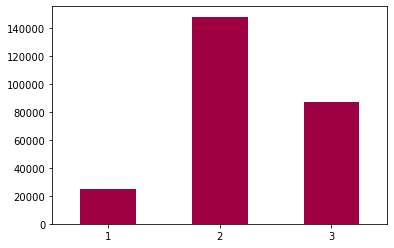

In [20]:
general_damage = df['damage_grade'].value_counts(sort=False)
general_damage.plot(kind='bar', rot=0, cmap=cmapMatplotlib)
plt.show()

Podemos ver en el grafico anterior que la gran mayoría de edificios tienen daño medio.
Queremos ver que fue lo que ocasionó ese nivel de daño, asi que vamos a empezar a discriminar por distribucion geográfica y analizar las variables de cada dato.


En el siguiente gráfico vemos que las edificaciones no estan distribuidas uniformemente en las regiones indicadas en *geo_level_1_id*

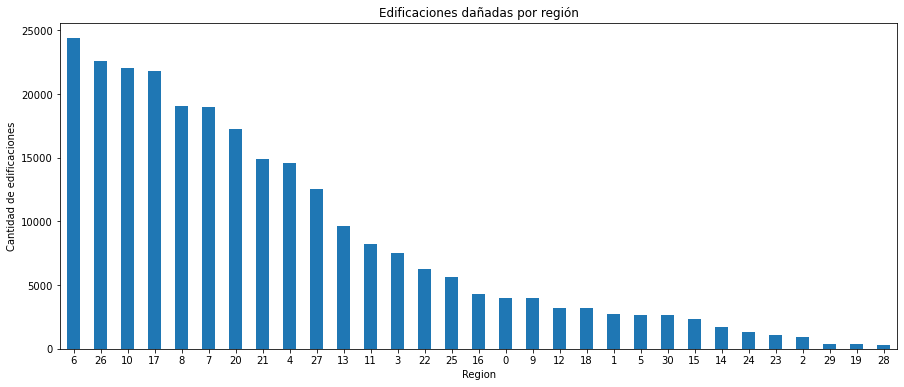

In [21]:
df['geo_level_1_id'].value_counts().plot(kind='bar', figsize=(15,6), rot=0, title='Edificaciones dañadas por región')
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones')
ax.set_xlabel('Region')
plt.show()

De aca se puede ver que la zona que mas aparece en el dataset es la zona 6.  
Pero esto no nos dice el grado de daño de la zona 6. Es decir, podria haber muchos edificios en la zona
6 con daño de tipo 1 (poco daño)  

## Discriminemos por **grado de daño.**

In [22]:
damage_grade_por_region_geoLeve1=df[['geo_level_1_id','damage_grade']].value_counts().to_frame().reset_index().rename(columns={0:'count'}).pivot_table(index='geo_level_1_id',columns='damage_grade',values='count').fillna(0)
damage_grade_por_region_geoLeve1

damage_grade,1,2,3
geo_level_1_id,,,
0,337.0,3075.0,599.0
1,411.0,1985.0,305.0
2,85.0,610.0,236.0
3,245.0,4550.0,2745.0
4,521.0,11164.0,2883.0
5,446.0,2014.0,230.0
6,2108.0,16222.0,6051.0
7,1033.0,11273.0,6688.0
8,654.0,8513.0,9913.0


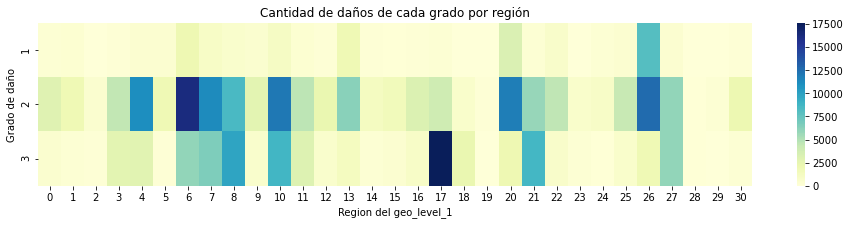

In [23]:
plt.figure(figsize=(16,3))
sns.heatmap(data=damage_grade_por_region_geoLeve1.T,cmap=cmap)
plt.title('Cantidad de daños de cada grado por región')
plt.ylabel('Grado de daño')
plt.xlabel('Region del geo_level_1')
plt.show()

En el heatmap podemos observar que en la zona geo_level1 la region con mayor daño de grado 3 es la region 17 (por mucho) y la region 6 tuvo mucho daño de grado medio.  
Este daño: 
- ¿Se da porque hay mas edificios en la zona 17? 
- ¿Porcentualmente hay muchos edificios dañados con grado 3 en esa zona?  

En caso de que la segunda pregunta sea verdadera, podemos concluir que seria una buena idea ver **qué caracteristicas diferencian** a las edificaciones de la región 17 y la region 6.  

- ¿Hay diferencias en las estructuras?
    - ¿Cantidad de pisos?
    - ¿Cantidad de familias viviendo ahi? (¿puede ser condicion de hacinamiento?)
    - ¿Qué dicen los datos binarios de las super_estructuras?
- ¿Vale la pena usar el dato de geo_level_2 y geo_level_3?
    - Debemos identificar que zonas de geo_level_2 y geo_level_3 estan dentro de geo_level_1

### Escribamos el valor de daño grado 3 con respecto al total de daños en esa zona

In [24]:
daños_totales=damage_grade_por_region_geoLeve1[1]+damage_grade_por_region_geoLeve1[2]+damage_grade_por_region_geoLeve1[3]
daños_porcentuales_geoLevel1=damage_grade_por_region_geoLeve1.agg(lambda x: x/daños_totales)
daños_porcentuales_geoLevel1

damage_grade,1,2,3
geo_level_1_id,,,
0,0.084019,0.766642,0.149339
1,0.152166,0.734913,0.112921
2,0.091300,0.655209,0.253491
3,0.032493,0.603448,0.364058
4,0.035763,0.766337,0.197900
5,0.165799,0.748699,0.085502
6,0.086461,0.665354,0.248185
7,0.054386,0.593503,0.352111
8,0.034277,0.446174,0.519549


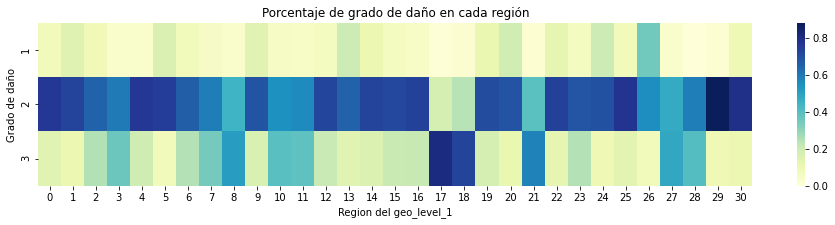

In [25]:
plt.figure(figsize=(16,3))
sns.heatmap(data=daños_porcentuales_geoLevel1.T,cmap=cmap)
plt.title('Porcentaje de grado de daño en cada región')
plt.ylabel('Grado de daño')
plt.xlabel('Region del geo_level_1')
plt.show()

El contraste entre este heatmap y el anterior es enorme.  
Primero que nada podemos observar que el mayor porcentaje se sitúa en los daños de grado 2. Esto no es para nada raro si consideramos que, como muestra el primer grafico del notebook, la mayoria de edificios mostraron daños de grado 2.  
Las excepciones son las zonas 17 y 18 que mostraron porcentualmente un gran daño de grado 3.  
Podemos ver que la zona 29 tiene el mayor porcentaje de daños de grado 2 pero en el heatmap anterior **esta practicamente vacío.**  
Esto lo podemos atribuir a que al haber tan pocos datos sobre los daños en esa zona, porcentualmente da valores muy grandes.  
Es por eso que para eliminar estas conclusiones que pueden ser erróneas, filtraremos los datos de las zonas que esten por debajo de cierto valor.  
Otra cosa importante a observar es que las zonas 17 y 18 son una excepcion a la regla, y muestran porcentualmente mayor cantidad de daños de grado 3. Es decir que efectivamente **fueron las zonas mas dañadas por este terremoto**. Pero no nos detenemos ahi, podemos ver que la zona 18 tiene un porcentaje de daño 3 similar a la zona 17, pero en el siguiente grafico veremos que la cantidad de daños de tipo 3 en la zona 18 son mucho menores a la zona 17, es decir **hubo mas edificios dañados en la zona 17.**

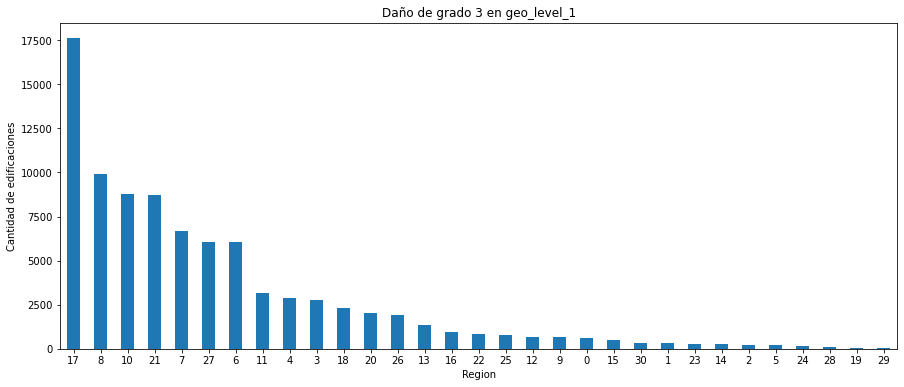

In [26]:
geo_level_1_damage_3=df.loc[df['damage_grade'] == 3, 'geo_level_1_id'].value_counts()
geo_level_1_damage_3.plot(kind='bar', figsize=(15,6), rot=0, title='Daño de grado 3 en geo_level_1')
ax=plt.gca()
ax.set_ylabel('Cantidad de edificaciones')
ax.set_xlabel('Region')
plt.show()

El mayor daño se concentra en las regiones 17,8,10,21,7,27,6.
- ¿A que se debe esto? ¿Son zonas con edificaciones más antiguas? 
- ¿Los materiales de construcciones son distintos a los de las zonas que se vieron menos afectadas?  

Las zonas con mucho menos daños pueden ser por haber menor cantidad de edificios, es probable que tengamos que filtrar esos datos porque son ruido en nuestro análisis.  
Como mencionamos anteriormente, en la zona 18 hay muy pocos daños si bien porcentualmente son muchos. Esto nos da la idea de que no hay muchos edificios en esa zona. Para hacer un analisis bueno deberiamos ver las zonas con mayor cantidad de edificios dañados.

In [27]:
daños_totales=damage_grade_por_region_geoLeve1[1]+damage_grade_por_region_geoLeve1[2]+damage_grade_por_region_geoLeve1[3]

daños_porcentuales_grado3_geoLevel1=damage_grade_por_region_geoLeve1.agg(lambda x: x/daños_totales)

Se observa claramente que esta zona fue fuertemente afectada por el terremoto. La mayoria de edificios tuvieron un daño de grado 3, cosa que ya habiamos visto en el heatmap, pero de esta forma se ve mas claramente la diferencia. Considerando que el terremoto **tuvo la misma magnitud en todos los edificios analizados** podemos intuir que los datos de esta region nos van a dar una buena idea de que genero los mayores daños (grado 3).  

Vamos a filtrar nuestro dataset. Calculamos el total de edificios dañados por region y calculamos el cuantil 25%. Nos quedamos con los valores que superen eso (de esa forma eliminamos valores muy chicos).

### Asi quedan los graficos cuando eliminamos los datos con poca relevancia

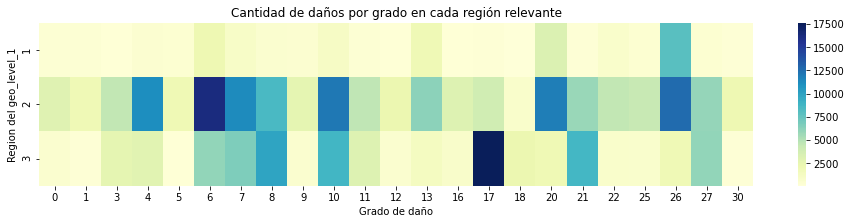

In [28]:
damage_grade_relevante_por_region=damage_grade_por_region_geoLeve1[daños_totales>daños_totales.quantile(0.25)]
plt.figure(figsize=(16,3))
sns.heatmap(data=damage_grade_relevante_por_region.T,cmap=cmap)
plt.title('Cantidad de daños por grado en cada región relevante')
plt.ylabel('Region del geo_level_1')
plt.xlabel('Grado de daño')
plt.show()

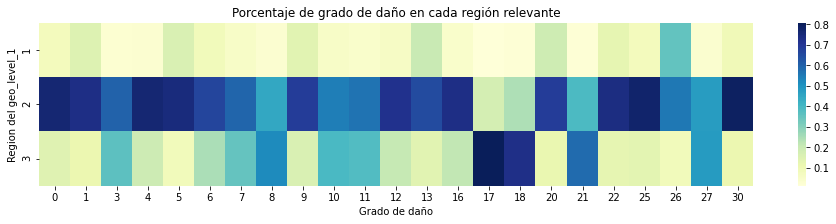

In [29]:
daños_totales_relevantes=daños_totales[daños_totales>daños_totales.quantile(0.25)]
daños_porcentuales_relevantes_geoLevel1=damage_grade_relevante_por_region.agg(lambda x: x/daños_totales_relevantes)
plt.figure(figsize=(16,3))
sns.heatmap(data=daños_porcentuales_relevantes_geoLevel1.T,cmap=cmap)
plt.title('Porcentaje de grado de daño en cada región relevante')
plt.ylabel('Region del geo_level_1')
plt.xlabel('Grado de daño')
plt.show()

Text(0.5, 0, 'Región de geo_level1')

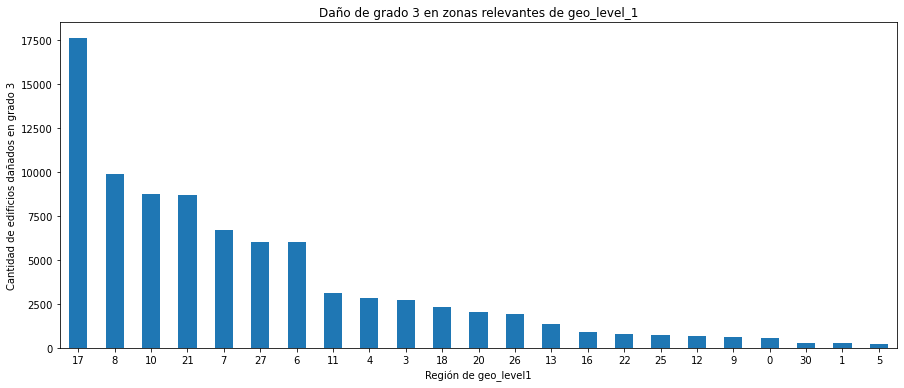

In [30]:
daño_grado3_geo1_relevantes=damage_grade_por_region_geoLeve1[daños_totales>daños_totales.quantile(0.25)][3]
daño_grado3_geo1_relevantes=daño_grado3_geo1_relevantes.sort_values(ascending=False)
daño_grado3_geo1_relevantes.plot(kind='bar',figsize=(15,6), rot=0, title='Daño de grado 3 en zonas relevantes de geo_level_1')
plt.ylabel('Cantidad de edificios dañados en grado 3')
plt.xlabel('Región de geo_level1')

#### Podemos apreciar la gran concentracion de daño en unas pocas zonas, incluso quedandonos con los 3 cuartiles superiores, se nota que el las zonas mas afectadas siguen destacando.  
Debemos ver **qué características las diferencian de las otras zonas**

## Analisis por cantidad de pisos 
Existe una relación entre la cantidad de pisos que tiene un edificio y el daño que recibio?

<AxesSubplot:>

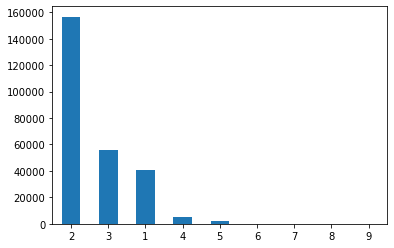

In [31]:
# train.loc[train['count_floors_pre_eq']]
df['count_floors_pre_eq'].value_counts().nlargest(10).plot(kind='bar', rot=0)

<AxesSubplot:xlabel='count_floors_pre_eq'>

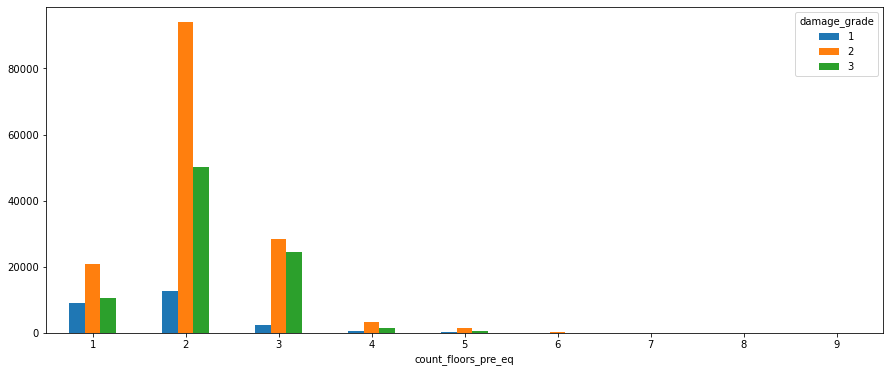

In [32]:
df[['count_floors_pre_eq', 'damage_grade']].value_counts().to_frame().rename(columns={0:'value_counts'}).pivot_table(index='count_floors_pre_eq', columns='damage_grade', values='value_counts').plot(kind='bar', figsize=(15,6), rot=0)

In [33]:
## Análisis segun la antiguedad de la construcción

In [34]:
construcciones_por_edad = df["age"].value_counts().sort_index()
minimos_casos = construcciones_por_edad.sum()/construcciones_por_edad.count()

In [35]:
daño_por_antiguedad = df[["building_id", "age", "damage_grade"]].pivot_table(index="age", columns="damage_grade", values="building_id",aggfunc="count").fillna(0)

In [36]:
total_dañados_por_antiguedad = daño_por_antiguedad[1]+daño_por_antiguedad[2]+daño_por_antiguedad[3]
daño_por_antiguedad_relevantes = daño_por_antiguedad[total_dañados_por_antiguedad > minimos_casos]
daño_por_antiguedad_porcentual_relevantes = daño_por_antiguedad_relevantes.divide(total_dañados_por_antiguedad, axis = 0).dropna()

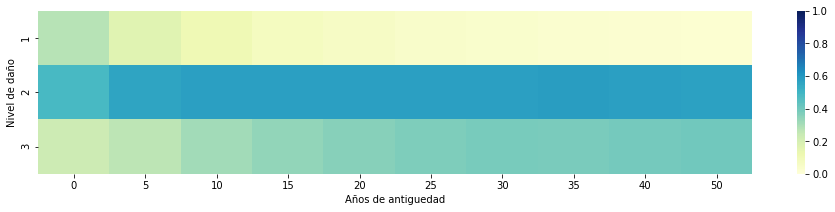

In [37]:
plt.figure(figsize=(16,3))
sns.heatmap(data=daño_por_antiguedad_porcentual_relevantes.T,cmap=cmap, vmin=0, vmax=1)
plt.ylabel('Nivel de daño')
plt.xlabel('Años de antiguedad')
plt.show()

Este heatmap es dificil de visualizar poe lo tanto no nos aporta mucha información. Probamos graficar los mismos datos en un gráfico de barras:

<AxesSubplot:title={'center':'Tipos de daño por edad'}, xlabel='age'>

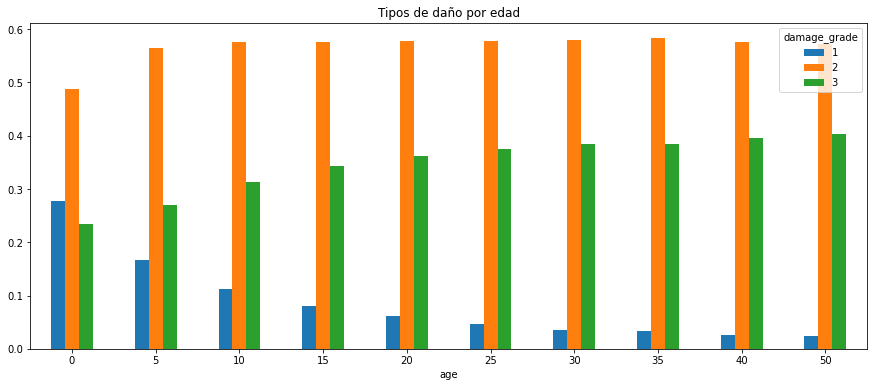

In [38]:
daño_por_antiguedad_porcentual_relevantes.plot(kind='bar', rot=0, title='Tipos de daño por edad', figsize=(15,6))

Esta representación es bastante más útil. Se puede ver claramente una tendencia de los niveles de daño.

Cuánto más antigua la construcción, mayor el daño sufrido con un gran incremento en los daños serios.

También podemos ver como a menor antiguedad, los daños bajos son mucho mas presentes desplazando principalmente a los daños graves y en menor medida los daños medianos.

## Analisis según las condiciones y los materiales de construcción

<AxesSubplot:xlabel='damage_grade'>

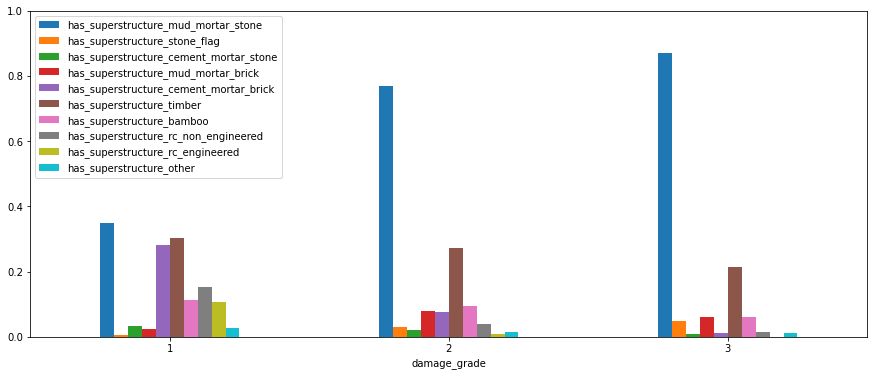

In [39]:
superstructure = df[['has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other','damage_grade']]

superstructure.groupby('damage_grade').agg(lambda x: x.sum() / x.count()).plot(kind='bar', figsize=(15,6), rot=0, ylim=(0,1))

### Edificaciones construidas con barro - piedra

In [40]:
superstructure['has_superstructure_mud_mortar_stone'].value_counts(normalize=True)

True     0.761935
False    0.238065
Name: has_superstructure_mud_mortar_stone, dtype: float64

In [41]:
no_superstructure_mud_mortar_stone = superstructure.loc[superstructure['has_superstructure_mud_mortar_stone'] == False, 'damage_grade']
print(df['damage_grade'].mean())
print(no_superstructure_mud_mortar_stone.mean())

2.2382723013342236
1.9194068343004513


<AxesSubplot:>

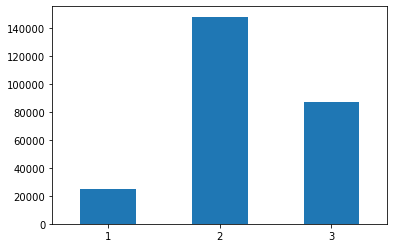

In [42]:
general_damage.plot(kind='bar', rot=0)

<AxesSubplot:>

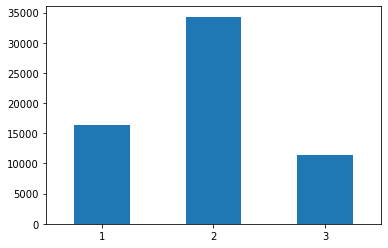

In [43]:
no_superstructure_mud_mortar_stone.value_counts(sort=False).plot(kind='bar', rot=0)

El 76% de las edificaciones fueron construidas con barro - piedra. Si nos quedamos solamente con aquellas edificaciones que no fueron construidas con barro - piedra vemos que el daño promedio es mucho menor al general.

### Edificaciones construidas con cemento - piedra

In [44]:
superstructure['has_superstructure_cement_mortar_brick'].value_counts(normalize=True)

False    0.924732
True     0.075268
Name: has_superstructure_cement_mortar_brick, dtype: float64

In [45]:
superstructure_cement_mortar_brick = superstructure.loc[superstructure['has_superstructure_cement_mortar_brick'] == True, 'damage_grade']
print(df['damage_grade'].mean())
print(superstructure_cement_mortar_brick.mean())

2.2382723013342236
1.6932959469793525


<AxesSubplot:>

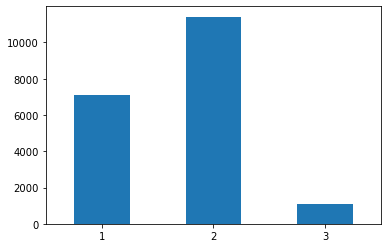

In [46]:
superstructure_cement_mortar_brick.value_counts(sort=False).plot(kind='bar', rot=0)

<AxesSubplot:>

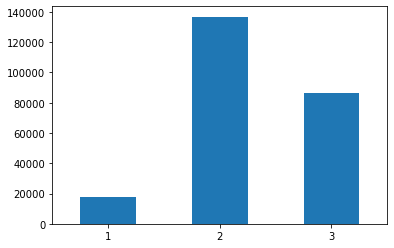

In [47]:
superstructure.loc[superstructure['has_superstructure_cement_mortar_brick'] == False, 'damage_grade'].value_counts(sort=False).plot(kind='bar', rot=0)

Solamente el 7,5% de las edificaciones fueron construidas con cemento - piedra. El daño promedio es mucho menor en comparación al general. Vemos que la proporcion de edificaciones que sufrieron un daño de grado 3 es notoriamente menor para aquellas construidas con estos materiales.